
# Exploring the Data

### Objective
The purpose of this task is to perform a comprehensive data quality assessment and exploration of a given dataset. We will generate key
visualizations and reports to understand the data distribution, detect patterns, and address any data quality issues, such as missing or incorrect data.

### Steps
1. Preliminary Data Exploration
    - Number of rows and columns
    - Data types
    - Converting datatypes (optional)
    - Statistics for numerical columns
    - Statistics for categorical columns

1. Data Quality Report
    - Missing data analysis
    - Incorrect data detection
    - Outliers detection

1. Dealing with Missing Data
    - Removing columns with 50+% of missing data
    - Imputing missing values

1.  Data Exploration
    - Histograms
    - Bar plots
    - Scatter plots
    - Correlation matrix

1. Questions
    - Question
        + If the answer is distributions are skewed/exponential
        + If the answer is distributions are normal
        + Distributions are significanly different
    - Question 2
        + `Entire homes/apts` and `Hotel rooms` are consistently more expensive [at the high end of the price range]
        + Room type affects pricing
    - Question 3
        + Correlation between number_of_reviews and availability_365 is: 0.0682; any close to 0 number is accepted
        + We CANNOT say that listings with more reviews tend to be less available, there is no strong linear relationship
    - Question 4
        +  There are outliers
        +  Price has more more outliers on the upper end; while Minimum nights has more outliers on the lower
    - Question
        + Hosts with multiple listings compared to single-listing hosts have 
            - higher prices
            - properties available for more days of the year
            - receive slightly fewer reviews per listing

        
    


In [1]:

# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("listings_new_york_2024.csv")

# Display the first 3 rows
df.head(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,NaN
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,NaN


## 1. Preliminary Data Exploration

### Number of rows and columns

In [2]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 37765
Number of Columns: 18


### Data types

In [3]:
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### Converting datatypes (optional)

In [4]:

# Step 1: Convert columns 'id' and 'host_id' to 'category' type
ids = ['id', 'host_id']
df[ids] = df[ids].astype('category')

# Step 2: Convert 'last_review' column to 'datetime' type
# df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'] = pd.to_datetime(df['last_review']).dt.floor('D')

# Step 3: Convert columns that have data of type object into 'category' type
categorical_features = df.select_dtypes(include='object').columns
df[categorical_features] = df[categorical_features].astype('category')


df.dtypes


id                                      category
name                                    category
host_id                                 category
host_name                               category
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                 category
dtype: object

### Statistics for numerical columns

In [5]:

# Generate summary statistics and round them
summary_stats = df.describe().round(2)

# Convert the summary statistics into a DataFrame
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df['last_review'] = pd.to_datetime(summary_stats_df['last_review'])
summary_stats_df['last_review'] = summary_stats_df['last_review'].dt.strftime('%Y-%m-%d')

# Display the resulting DataFrame
summary_stats_df

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,37765.00,37765.00,23044.00,37765.00,37765.0,1970-01-01,26014.00,37765.00,37765.00,37765.00
mean,40.73,-73.95,221.07,29.16,24.9,2022-04-22,0.91,53.76,152.41,3.99
min,40.50,-74.25,8.00,1.00,0.0,2011-05-12,0.01,1.00,0.00,0.00
25%,40.69,-73.98,86.00,30.00,0.0,2020-03-13,0.09,1.00,0.00,0.00
50%,40.73,-73.95,150.00,30.00,3.0,2023-09-03,0.32,2.00,126.00,0.00
75%,40.76,-73.93,250.00,30.00,21.0,2024-04-26,1.13,8.00,301.00,3.00
max,40.91,-73.71,100000.00,1250.00,1915.0,2024-07-05,103.53,842.00,365.00,1568.00
std,0.06,0.05,766.62,30.20,58.8,NaN,1.86,161.98,142.80,15.76


### Statistics for categorical columns

In [6]:
# Create an empty list to store the analysis for each categorical column
categorical_analysis = []

# Loop through each categorical column and gather information
categorical_columns = df.select_dtypes(include=['category'])

for col in categorical_columns:
    # Get unique value count
    unique_values = df[col].nunique()
    
    # Get the mode (most frequent value)
    mode = df[col].mode()[0]
    mode_count = df[col].value_counts().iloc[0]
    mode_pct = (mode_count / len(df)) * 100

    # Get the second mode (second most frequent value if it exists)
    if len(df[col].value_counts()) > 1:
        second_mode = df[col].value_counts().index[1]
        second_mode_count = df[col].value_counts().iloc[1]
        second_mode_pct = (second_mode_count / len(df)) * 100
    else:
        second_mode = None
        second_mode_count = 0
        second_mode_pct = 0

    # Append the results to the list
    categorical_analysis.append({
        'Feature': col,
        'Unique Values': unique_values,
        'Mode': mode,
        'Mode Count': mode_count,
        'Mode %': mode_pct,
        'Second Mode': second_mode,
        'Second Mode Count': second_mode_count,
        'Second Mode %': second_mode_pct
    })

# Convert the list of dictionaries into a DataFrame
categorical_analysis_df = pd.DataFrame(categorical_analysis)

# Display the resulting DataFrame without index
categorical_analysis_df.style.hide()

Feature,Unique Values,Mode,Mode Count,Mode %,Second Mode,Second Mode Count,Second Mode %
id,37765,2595,1,0.002648,700656334389279385,1,0.002648
name,36050,Water View King Bed Hotel Room,30,0.079439,Private bedroom -3 mins to shopping center,28,0.074143
host_id,22663,107434423,842,2.229578,3223938,692,1.832384
host_name,8534,Blueground,842,2.229578,Eugene,698,1.848272
neighbourhood_group,5,Manhattan,16715,44.260559,Brooklyn,13885,36.766848
neighbourhood,225,Bedford-Stuyvesant,2709,7.173309,Williamsburg,2206,5.841388
room_type,4,Entire home/apt,20023,53.019992,Private room,16645,44.075202
license,1732,Exempt,2872,7.604925,OSE-STRREG-0000068,99,0.262147


## 2. Data Quality Report

### Missing data analysis

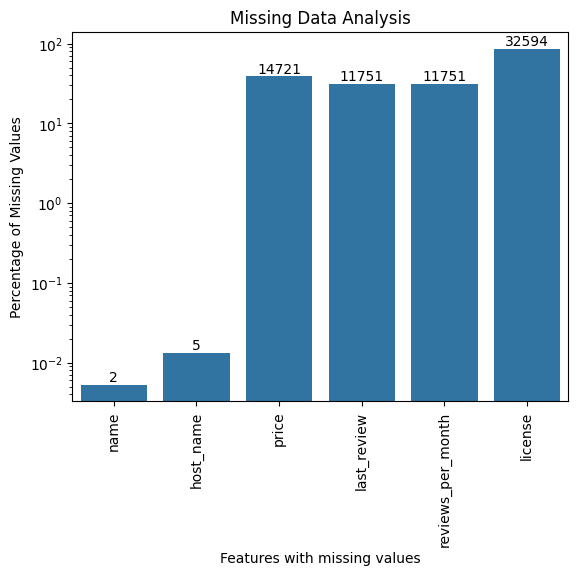

In [7]:
# Step 1: Find Missing Data 
missing_data = df.isnull().sum()
missing_percentage = (missing_data / df.shape[0]) * 100

# Step 2: Create a DataFrame using the two arrays
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=df.columns)

# Step 3: Filter to include only rows with non-zero missing data and drop any None/NaN labels
missing_df_filtered = missing_df[missing_df['Missing Data'] > 0].dropna()

# Step 4: Visualize missing data using a bar plot with log scale for better visualization
ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'])

# Step 5: Add the number of missing values on top of each bar
for i, value in enumerate(missing_df_filtered['Missing Data']):
    ax.text(i, missing_df_filtered['Missing Percentage'].iloc[i],
            f'{int(value)}', ha='center', va='bottom')

# Customize the plot
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Data Analysis')
ax.set_xlabel('Features with missing values')
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')




Notice that both `last_review` (date of the last review) or `reviews_per_month` features have 11,751 missing values. This indicates that these two columns are most likely related, and missing values in one column correlate with missing values in the other. 

If we look at the data, we notice that  listings without any reviews will have missing values in both columns `last_review` and `reviews_per_month`.

### Incorrect data detection

In [8]:
# Checking for negative values, and potential outliers or errors
incorrect_entries = {
    'Negative Prices': df[df['price'] < 0],
    'Zero or Negative Minimum Nights': df[df['minimum_nights'] <= 0],
    'Negative Reviews Per Month': df[df['reviews_per_month'] < 0],
    'Negative Availability': df[df['availability_365'] < 0],
}

# Check if incorrect entries exist
if all(len(data) == 0 for data in incorrect_entries.values()):
    print("No incorrect data found")

# Display incorrect entries if they exist
for label, data in incorrect_entries.items():
    if len(data) > 0:  # Check if the DataFrame has any rows
        print(f"Incorrect Entries: {label}")
        display(data)

No incorrect data found


### Outliers detection

In [9]:
def detect_outliers_iqr(df, column):
    """
    Detect outliers in a column using the IQR method.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column to check for outliers.
    
    Returns:
    DataFrame: A DataFrame containing the outliers for that column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    lower_outliers = df[df[column] < lower_bound]
    upper_outliers = df[df[column] > upper_bound]
    # outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers = pd.concat([lower_outliers, upper_outliers], axis=0)
    
    return outliers, lower_outliers, upper_outliers, lower_bound, upper_bound


# Step 1: Select all numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Detect outliers for each numerical column
outliers_dict = {}
for col in numerical_columns:
    outliers, *_ = detect_outliers_iqr(df, col)
    if not outliers.empty:  # Only store columns with outliers
        outliers_dict[col] = outliers

# Step 3: Display the outliers for each numerical column
if outliers_dict:
    print("Using IQR Rule we found outliers in:")
    for col, outliers in outliers_dict.items():
        print(f"  '{col}': {len(outliers)} entries")
else:
    print("No outliers detected in any numerical columns.")


Using IQR Rule we found outliers in:
  'latitude': 410 entries
  'longitude': 2601 entries
  'price': 1437 entries
  'minimum_nights': 7317 entries
  'number_of_reviews': 5072 entries
  'reviews_per_month': 2188 entries
  'calculated_host_listings_count': 7104 entries
  'number_of_reviews_ltm': 5321 entries


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

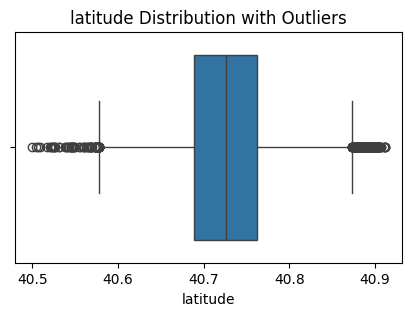

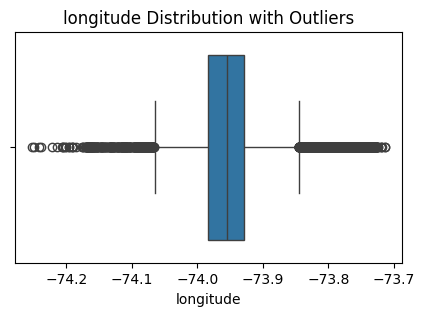

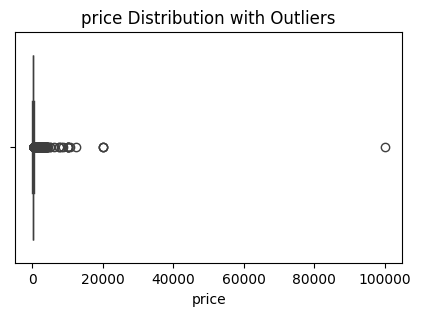

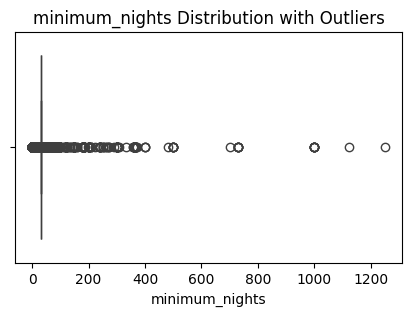

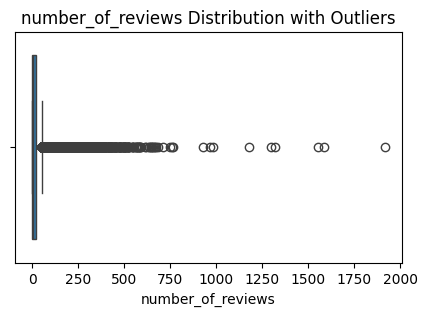

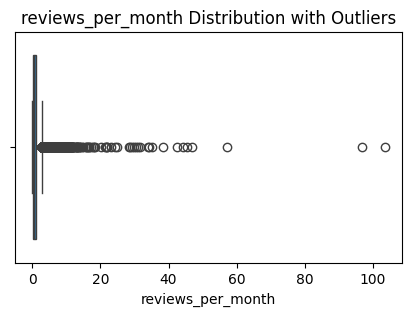

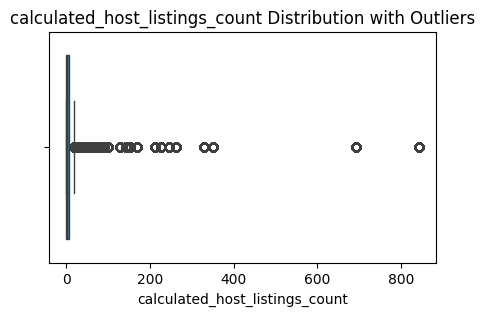

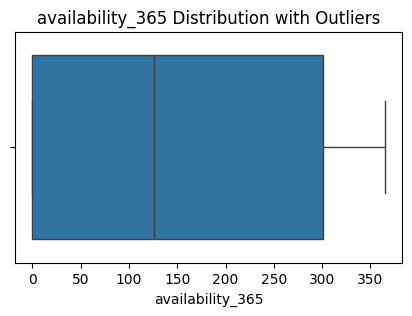

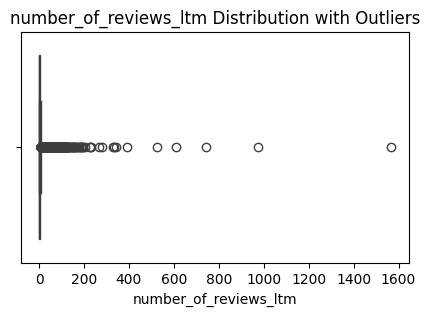

In [10]:
# Visualize outliers for each numerical column using boxplots
for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribution with Outliers')

The Interquartile Range (IQR) method identified a substantial number of data points as outliers. However, upon closer examination, many of these flagged entries appear to be legitimate data rather than true outliers. This suggests that the IQR method may be overly sensitive to certain distributions in our dataset.

 Let's consider an alternative method to detect outliers -- the 3 sigma rule (Z score).

In [11]:
def detect_outliers_n_sigma_rule(df, column, n=3):
    """
    Detect outliers using the n sigma rule (Z-score method).
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column to check for outliers.
    threshold (float): The Z-score threshold for defining outliers (default is 3).
    
    Returns:
    DataFrame: A DataFrame containing the outliers.
    """
    mean_col = np.mean(df[column])
    std_col = np.std(df[column])
    
    # Calculate the Z-scores
    z_scores = (df[column] - mean_col) / std_col
    
    # Find outliers based on the threshold
    outliers = df[np.abs(z_scores) > n]
    
    return outliers

# Apply 3 sigma rule method for outlier detection in all numerical columns
outliers_zscore_dict = {}
for col in numerical_columns:
    outliers = detect_outliers_n_sigma_rule(df, col, n=3)
    if not outliers.empty:
        outliers_zscore_dict[col] = outliers

# Display the Z-Score based outliers
if outliers_zscore_dict:
    for col, outliers in outliers_zscore_dict.items():
        print(f"Outliers detected in '{col}' using the 3 Sigma Rule: {len(outliers)} entries.")
else:
    print("No outliers detected using Z-Score.")

Outliers detected in 'latitude' using the 3 Sigma Rule: 79 entries.
Outliers detected in 'longitude' using the 3 Sigma Rule: 1011 entries.
Outliers detected in 'price' using the 3 Sigma Rule: 50 entries.
Outliers detected in 'minimum_nights' using the 3 Sigma Rule: 295 entries.
Outliers detected in 'number_of_reviews' using the 3 Sigma Rule: 836 entries.
Outliers detected in 'reviews_per_month' using the 3 Sigma Rule: 207 entries.
Outliers detected in 'calculated_host_listings_count' using the 3 Sigma Rule: 1534 entries.
Outliers detected in 'number_of_reviews_ltm' using the 3 Sigma Rule: 362 entries.


Better, but we still have many outliers. 

For our dataset, I would *leave them as is*.
The ''outliers'' are actually valid data points and represent natural variance (e.g., very expensive luxury listings in a real estate dataset), it's important to keep them. Removing them could distort the true distribution of the data.

Alternatively you can:
- Remove Outliers

    `df_cleaned = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]`
- Clamp Outliers

    `df['price'] = np.where(df['price'] > upper_bound, upper_bound, np.where(df['price'] < lower_bound, lower_bound, df['price']))`
- Use log scale of the data

    `df['price_log'] = np.log(df['price'] + 1)`


The analysis of the dataset indicates that:

- No incorrect entries in key fields:
    + There are no negative values for `price`, `minimum_nights`, `reviews_per_month`, or `availability_365`. This suggests that the basic fields related to listings are correct.

- Outliers in price and other numerical values:
    + There are some outliers in numerical values, e.g., in `price`. However, these listings may well be legitimate. For instance, they could be luxury listings that naturally have very large price.
    
No other incorrect entries like negative or nonsensical values were found.

## Dealing with Missing Data

### Removing columns with 50+% of missing data

In [12]:
# Define a threshold for removing columns with too much missing data
high_missing_threshold = 50
columns_to_drop = missing_df[missing_df['Missing Percentage'] > high_missing_threshold].index
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Columns dropped due to high missing values (> {high_missing_threshold}%): {columns_to_drop.tolist()}")

Columns dropped due to high missing values (> 50%): ['license']


### Imputing missing values

In [13]:
# Separate numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns using the median
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_value = df_cleaned[col].median()
        df_cleaned[col] = df_cleaned[col].fillna(median_value)
        print(f"Imputed missing values in '{col}' with median: {median_value}")

# Impute missing values for categorical columns using the mode
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)
        print(f"Imputed missing values in '{col}' with mode: {mode_value}")

# Final clean dataset
df_cleaned.sample(2)

Imputed missing values in 'price' with median: 150.0
Imputed missing values in 'reviews_per_month' with median: 0.32


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6744,13291508,Cozy comfortable private room in Brooklyn NY,67661003,Maki,Brooklyn,Windsor Terrace,40.65540,-73.98044,Private room,95.0,30,65,2023-06-19,0.81,1,136,0
25910,734885984815942908,"Luxury 2 Bedroom in Flushing, By Queens College",483074683,Lisanias,Queens,Flushing,40.73653,-73.81457,Entire home/apt,180.0,30,29,2024-06-10,1.39,1,316,14


## Data Exploration

### Histograms

In [14]:
# Ensure only true numerical columns are included
numeric_data = df_cleaned.select_dtypes(include=['number'])
numeric_data.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

Text(0.5, 0.98, 'Histograms')

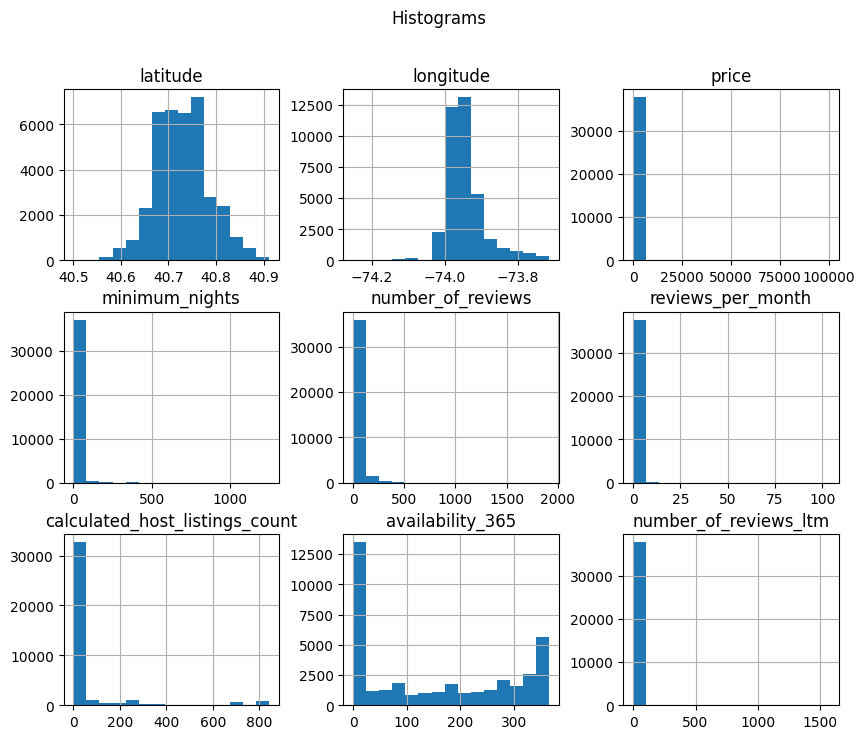

In [15]:
# Histograms for numerical columns
numeric_data.hist(figsize=(10, 8), bins=15)
plt.suptitle('Histograms')

Too crowded! Let's redo everything except 'latitude', 'longitude', and 'availability_365' in log10 scale.

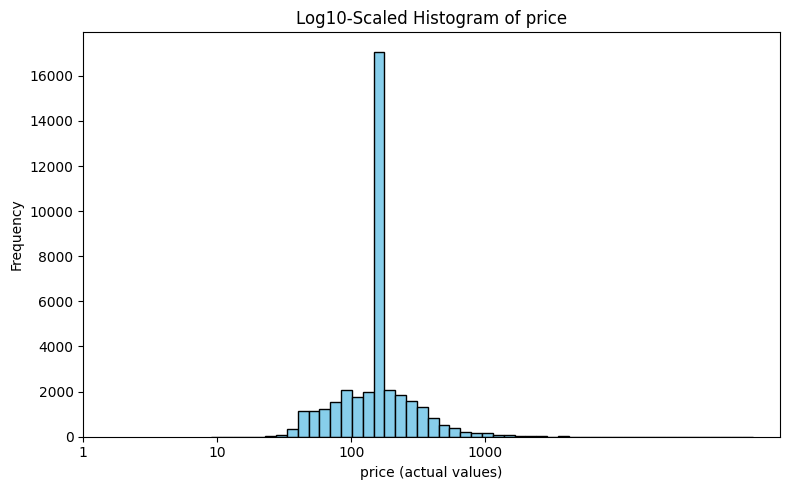

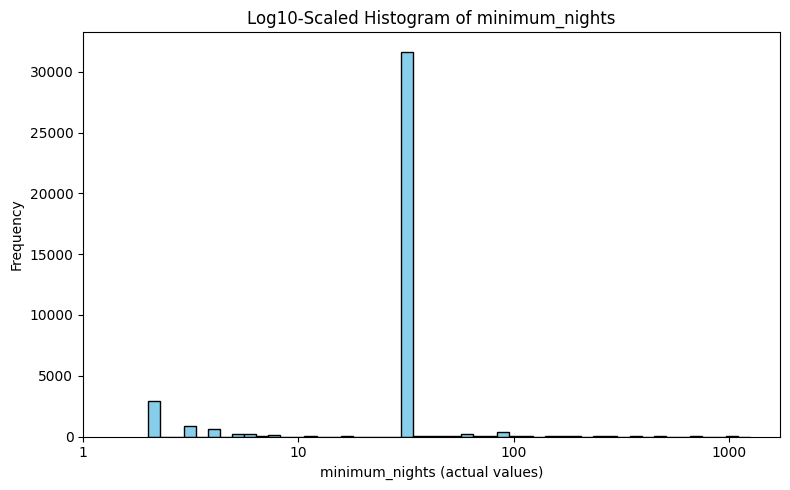

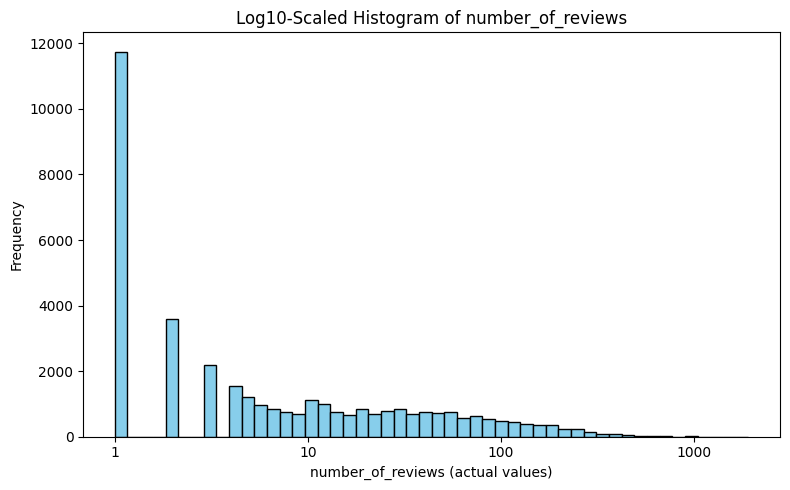

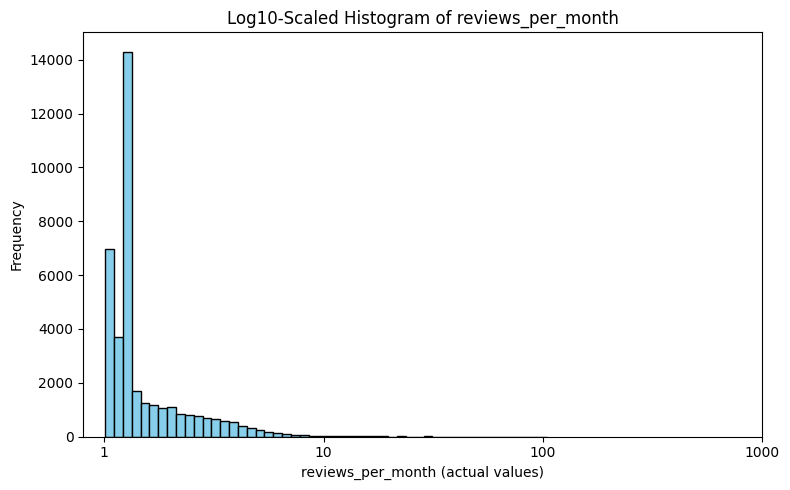

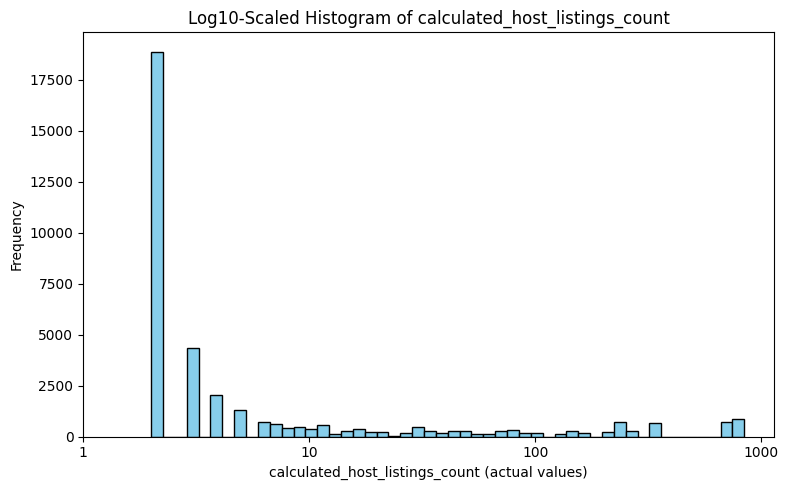

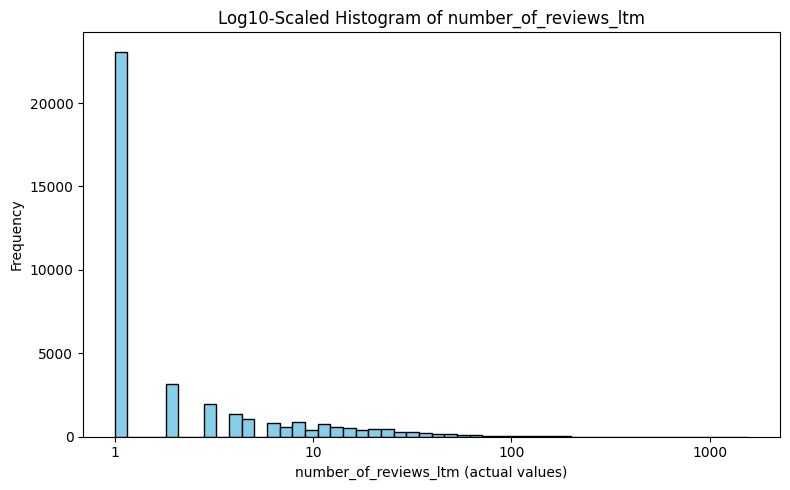

In [16]:
columns_to_plot = ['price', 'minimum_nights', 'number_of_reviews',
                   'reviews_per_month', 'calculated_host_listings_count',
                   'number_of_reviews_ltm']

# Create histograms for each column using log base 10
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    
    # Add a small constant to avoid log10(0) issues
    log_data = np.log10(df_cleaned[column] + 1)
    
    # Plot histogram
    plt.hist(log_data, bins=50, color='skyblue', edgecolor='black')
    
    # Set title and labels
    plt.title(f'Log10-Scaled Histogram of {column}')
    plt.xlabel(f'{column} (actual values)')
    plt.ylabel('Frequency')

    # Define custom tick positions (log scale) and corresponding labels (actual scale)
    tick_values = [1, 10, 100, 1000]  
    tick_labels = [f'{val}' for val in tick_values]
    
    # Set the custom ticks
    plt.xticks(np.log10(np.array(tick_values)), tick_labels)
    
    # Show the plot
    plt.tight_layout()

### Bar plots

In [17]:
categorical_columns = df_cleaned.select_dtypes(include=['category']).columns
categorical_columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type'],
      dtype='object')

In [18]:
for col in categorical_columns:
    print(f"{col} : {df_cleaned[col].nunique()}" )

id : 37765
name : 36050
host_id : 22663
host_name : 8534
neighbourhood_group : 5
neighbourhood : 225
room_type : 4


It makes sense to plot bar plots for non-numerous groups, i.e., `neighbourhood_group` and `room_type`

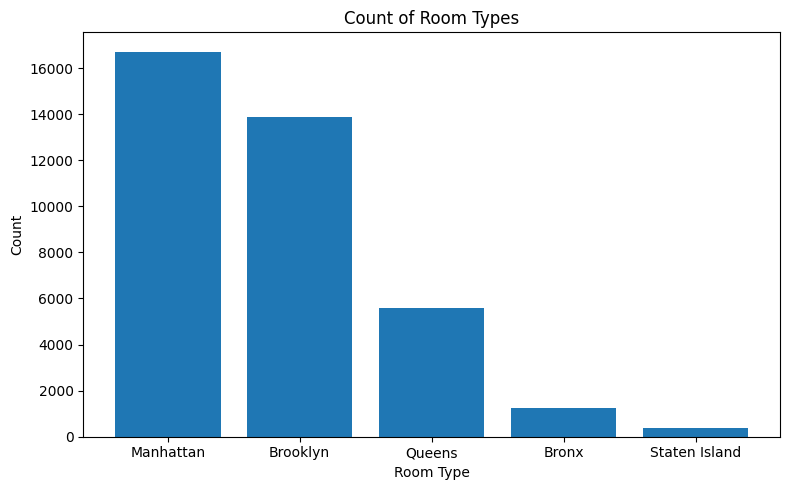

In [19]:
# Bar plot for room_type

# Count the occurrences of each room type
counts = df_cleaned['neighbourhood_group'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values)

# Adding title and labels
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()

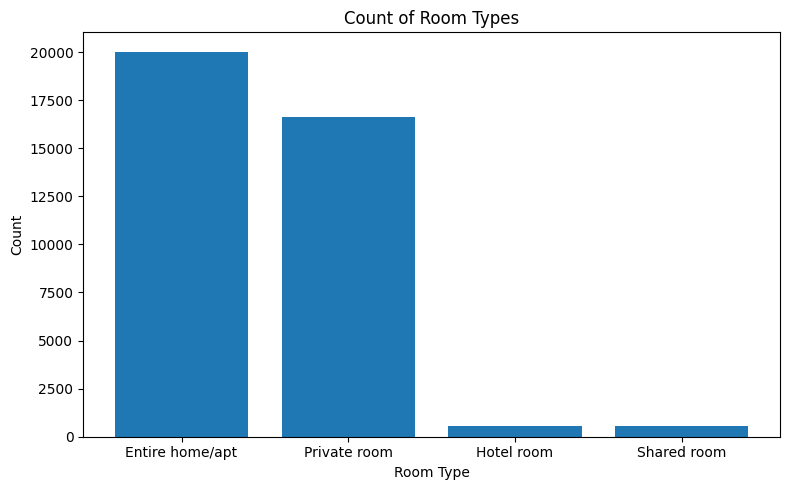

In [20]:
# Bar plot for room_type

# Count the occurrences of each room type
counts = df_cleaned['room_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values)

# Adding title and labels
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()

### Scatter plots

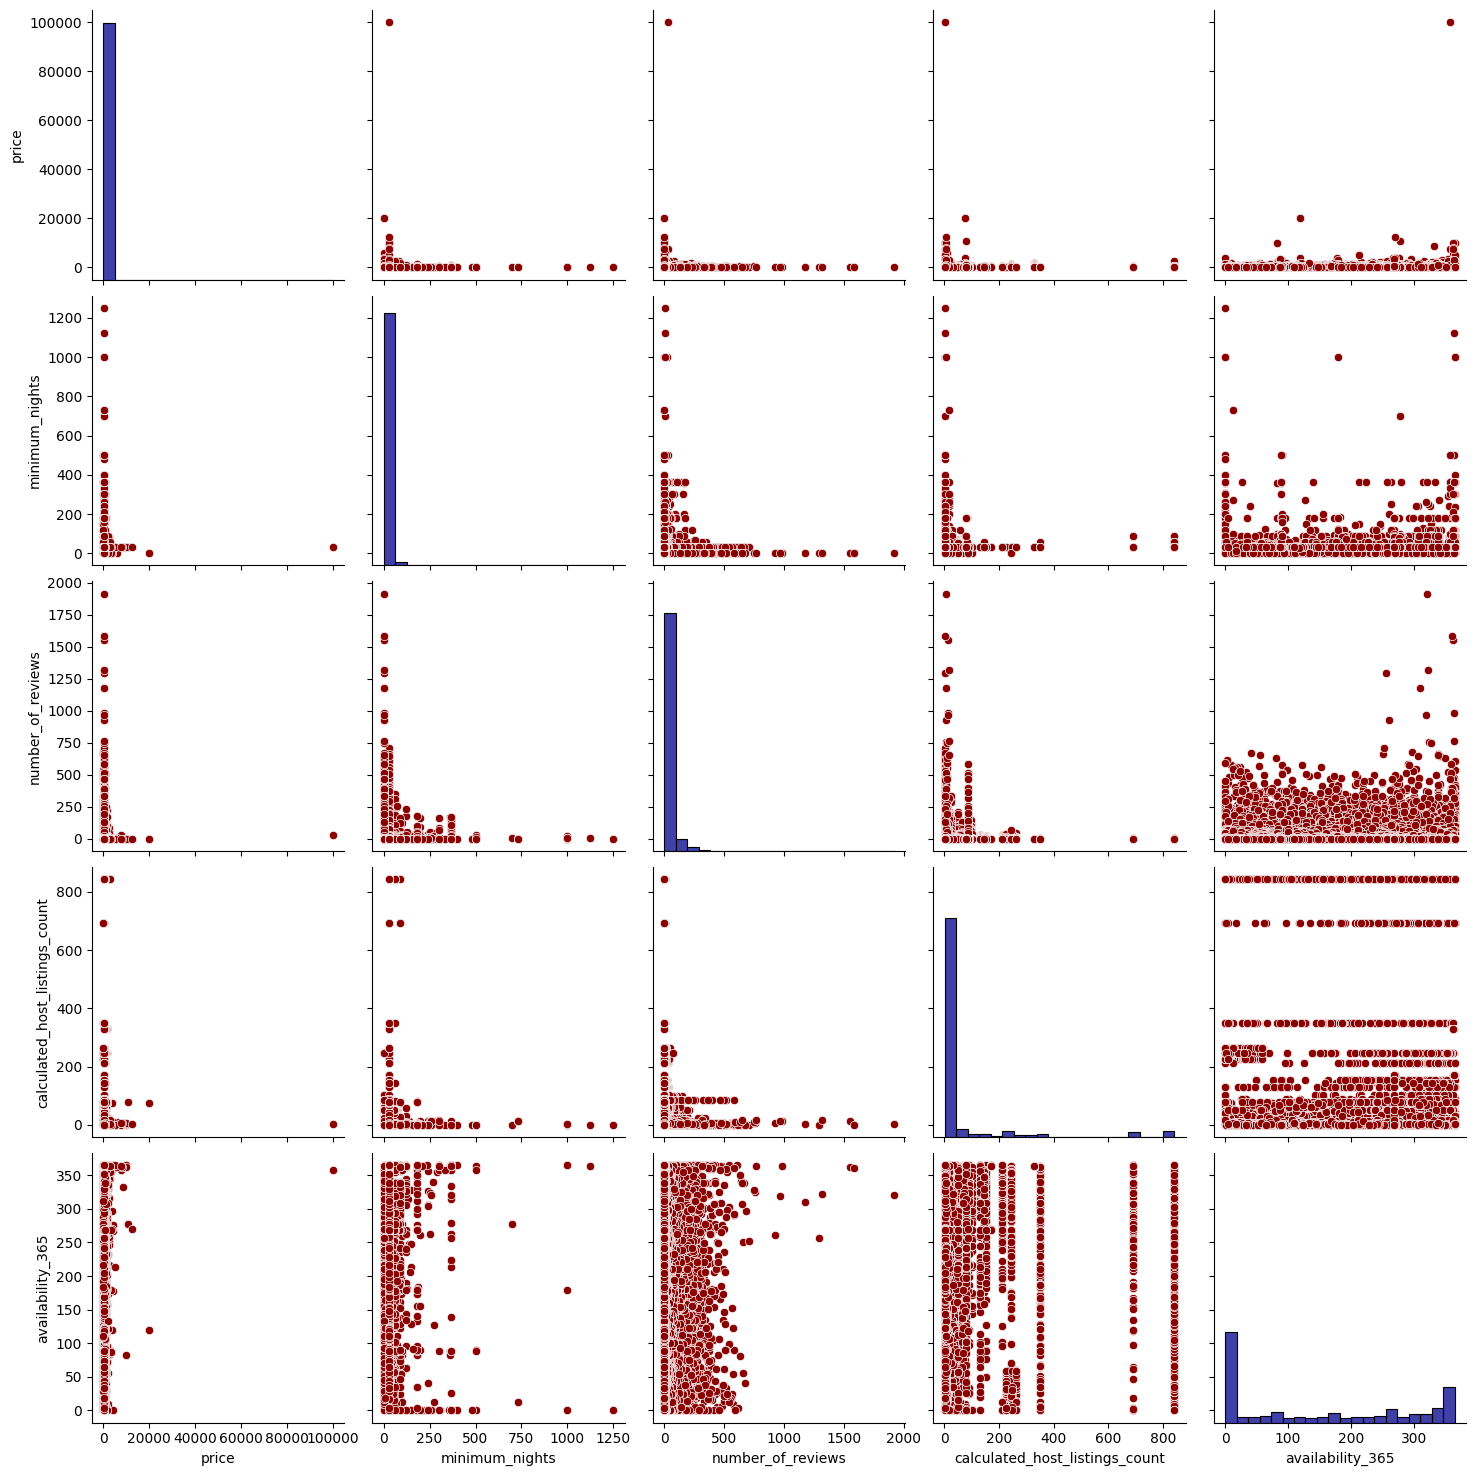

In [21]:
pair_plot_data = df_cleaned[['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count',
       'availability_365']]

sns.pairplot(data=pair_plot_data, kind='scatter', diag_kws={'bins':20, 'color':'darkblue','edgecolor':'black'},
            plot_kws={'marker':'o','color':'darkred'}, height=3);

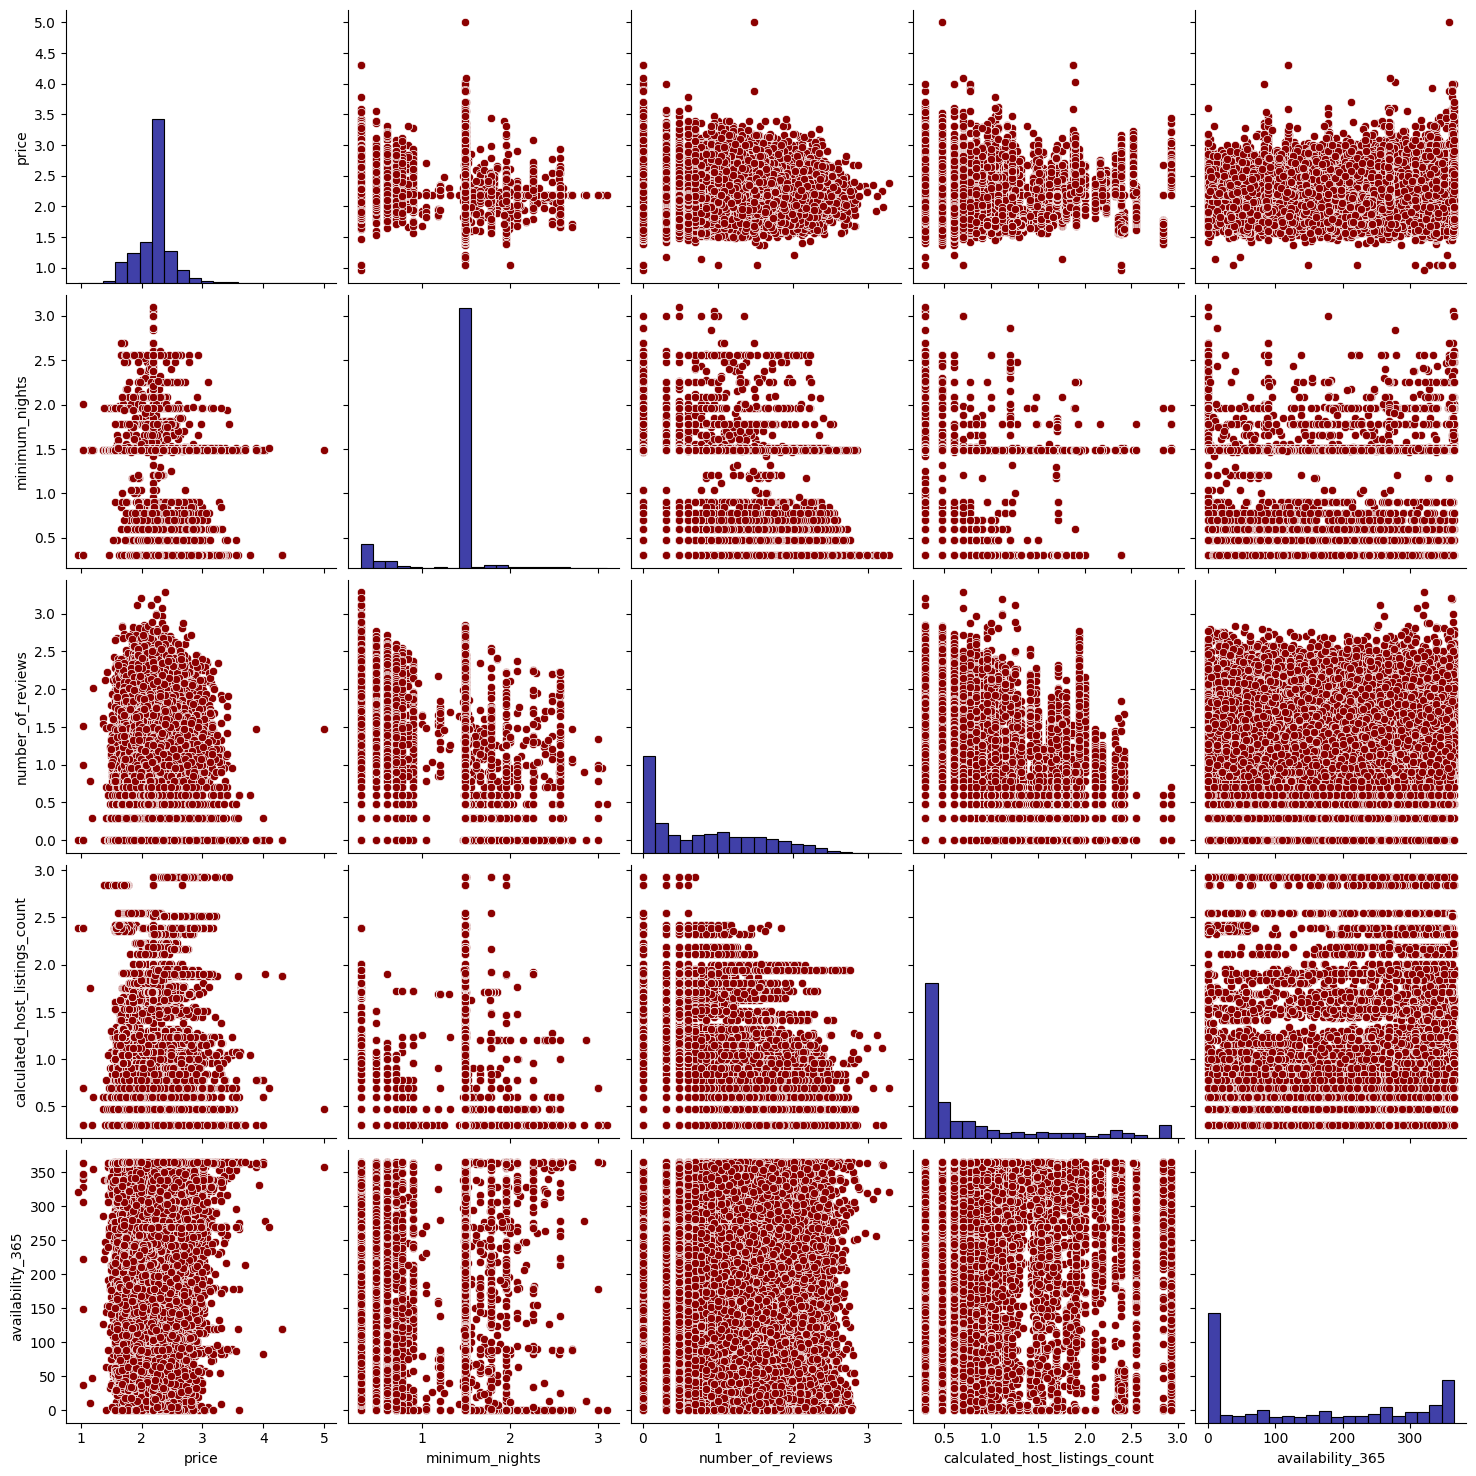

In [22]:
# Apply log10 transformation to relevant columns (excluding 'availability_365')
log_transformed_data = pair_plot_data.copy()
log_columns = ['price', 'minimum_nights', 'number_of_reviews',
               'calculated_host_listings_count']

# Applying log10 to selected columns and adding 1 to avoid log(0)
log_transformed_data[log_columns] = log_transformed_data[log_columns].apply(lambda x: np.log10(x + 1))

# Create the pair plot with the transformed data
sns.pairplot(data=log_transformed_data, kind='scatter', 
             diag_kws={'bins': 20, 'color': 'darkblue', 'edgecolor': 'black'},
             plot_kws={'marker': 'o', 'color': 'darkred'}, height=3);

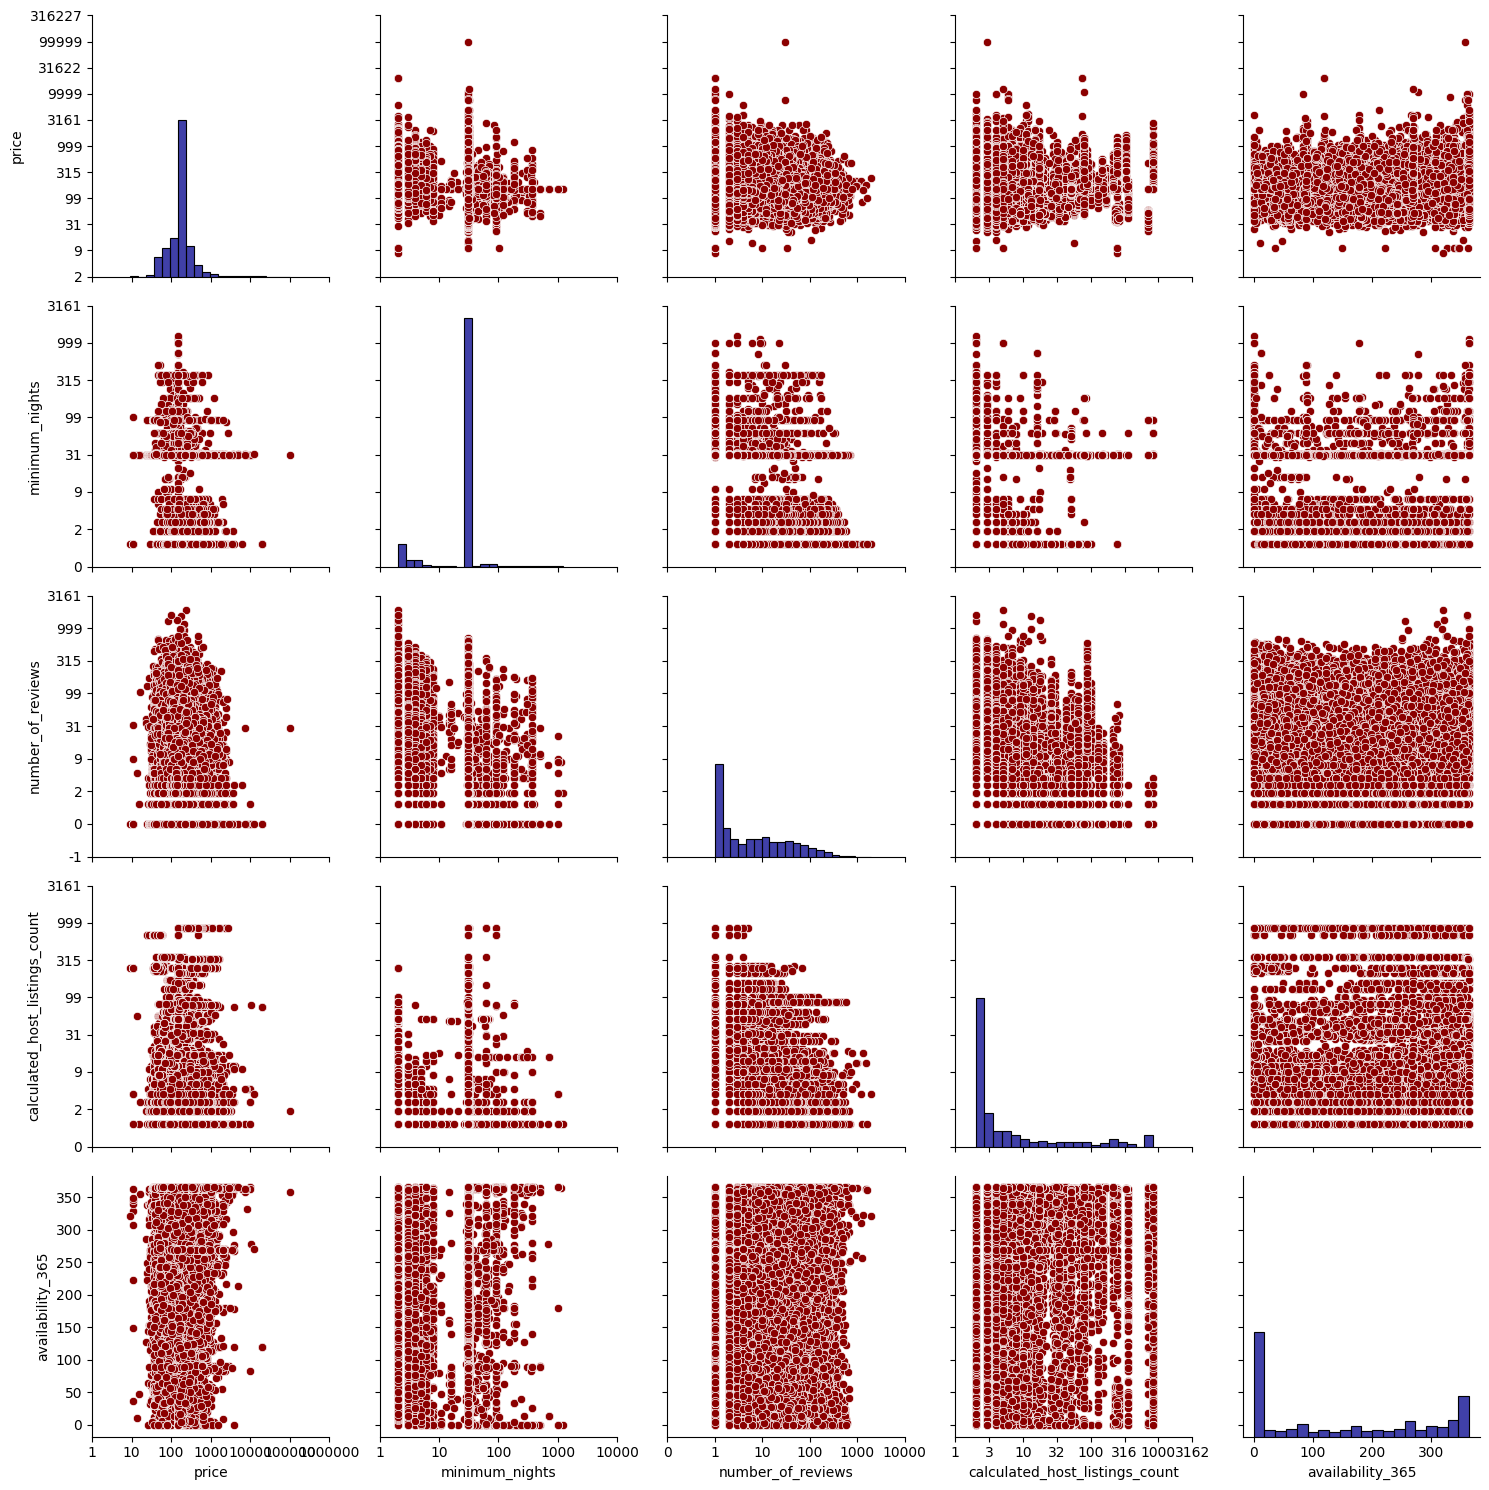

In [23]:
# Apply log10 transformation to relevant columns (excluding 'availability_365')
log_transformed_data = pair_plot_data.copy()
log_columns = ['price', 'minimum_nights', 'number_of_reviews',
               'calculated_host_listings_count']

# Applying log10 to selected columns and adding 1 to avoid log(0)
log_transformed_data[log_columns] = log_transformed_data[log_columns].apply(lambda x: np.log10(x + 1))

# Create the pair plot with the transformed data
g = sns.pairplot(data=log_transformed_data, kind='scatter', 
                 diag_kws={'bins': 20, 'color': 'darkblue', 'edgecolor': 'black'},
                 plot_kws={'marker': 'o', 'color': 'darkred'}, height=3)

# Define custom tick values and labels for the transformed columns
for ax in g.axes.flatten():  # Iterate over each plot in the pairplot
    if ax.get_xlabel() in log_columns:
        # Convert log-transformed ticks back to actual values for the x-axis
        xticks = ax.get_xticks()
        ax.set_xticks(xticks)
        ax.set_xticklabels([f'{10**tick :.0f}' for tick in xticks])

    if ax.get_ylabel() in log_columns:
        # Convert log-transformed ticks back to actual values for the y-axis
        yticks = ax.get_yticks()
        ax.set_yticks(yticks)
        ax.set_yticklabels([f'{10**tick - 1:.0f}' for tick in yticks])

# Adjust the plot layout
plt.tight_layout()

### Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

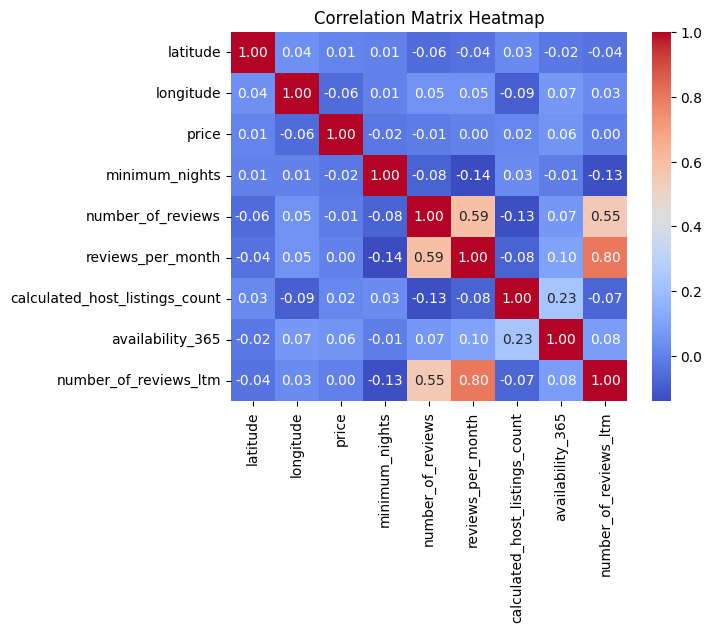

In [24]:
# Calculate and visualize the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')

## Questions

### Question1. What is the distribution of property prices across different neighborhoods, and are there significant differences between them?

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

Text(0.5, 0, 'Neighborhood')

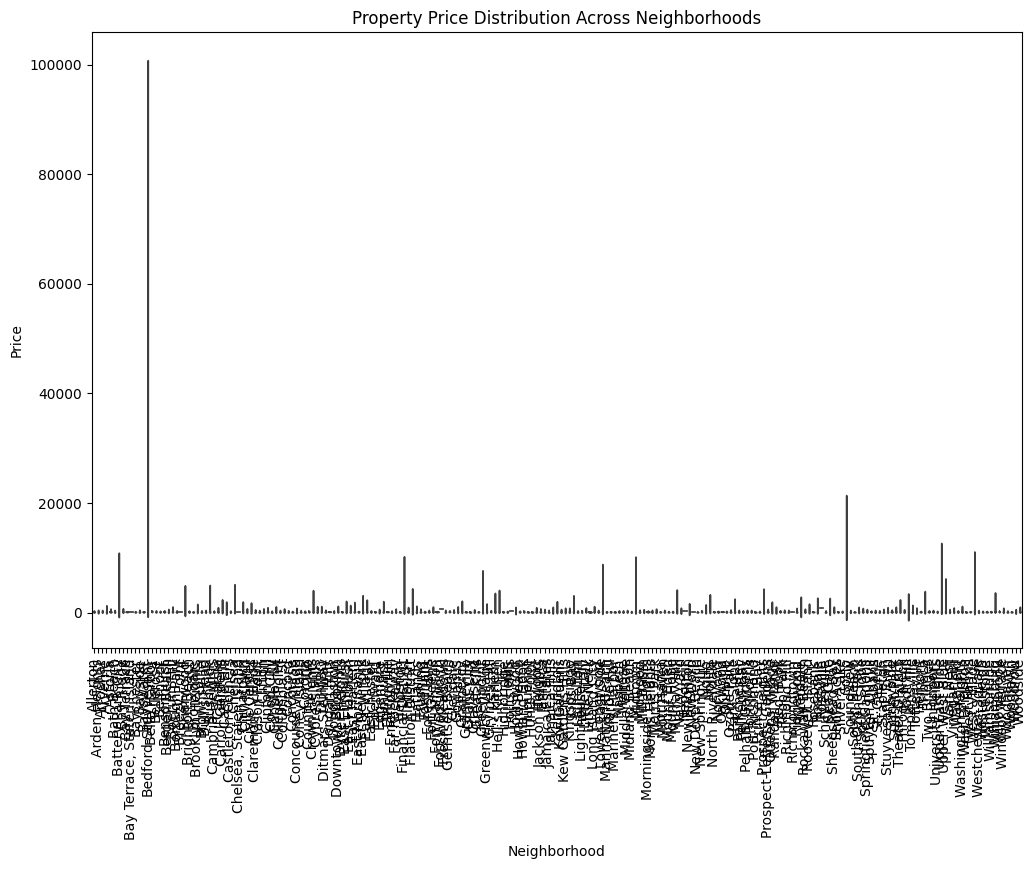

In [25]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='neighbourhood', y='price', data=df_cleaned, inner="quartile")
plt.xticks(rotation=90)
plt.title('Property Price Distribution Across Neighborhoods')
plt.ylabel('Price')
plt.xlabel('Neighborhood')

Too many neighborhoods! Let's try two randomly chosen.

['Long Island City' 'Rosebank']


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Price')

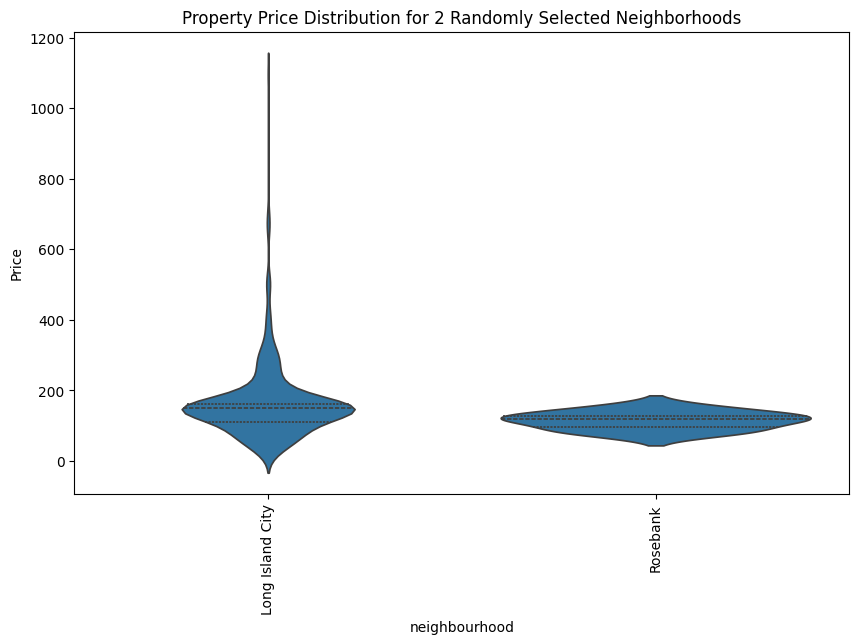

In [26]:
# Step 1: Randomly select two neighborhoods from the list
unique_neighborhoods = df_cleaned['neighbourhood'].unique()
np.random.seed(42)
random_neighborhoods = np.random.choice(unique_neighborhoods, size=2, replace=False)
print(random_neighborhoods)

# Step 2: Filter df_cleaned to include only the two randomly selected neighborhoods
df_two_neighborhoods = df_cleaned.loc[df_cleaned['neighbourhood'].isin(random_neighborhoods)].copy()

# Step 3: Explicitly cast the 'neighbourhood' column to category with the selected neighborhoods as categories
df_two_neighborhoods['neighbourhood'] = pd.Categorical(df_two_neighborhoods['neighbourhood'], categories=random_neighborhoods, ordered=False)

# Step 4: Create a violin plot to visualize the price distribution across these 2 neighborhoods
plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood', y='price', data=df_two_neighborhoods, inner="quartile")
plt.xticks(rotation=90)
plt.title('Property Price Distribution for 2 Randomly Selected Neighborhoods')
plt.ylabel('Price')
# plt.xlabel('Neighborhood')

#### Answer to Question 1: What is the distribution of property prices across different neighborhoods, and are there significant differences between them?

Distributions are skewed. (Answer exponential is accepted as well).

They are significanly different, see, for example, the violin plots above.

### Question 2: How does the room type affect the price? Are certain room types consistently more expensive?

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

Text(0.5, 0, 'Room Type')

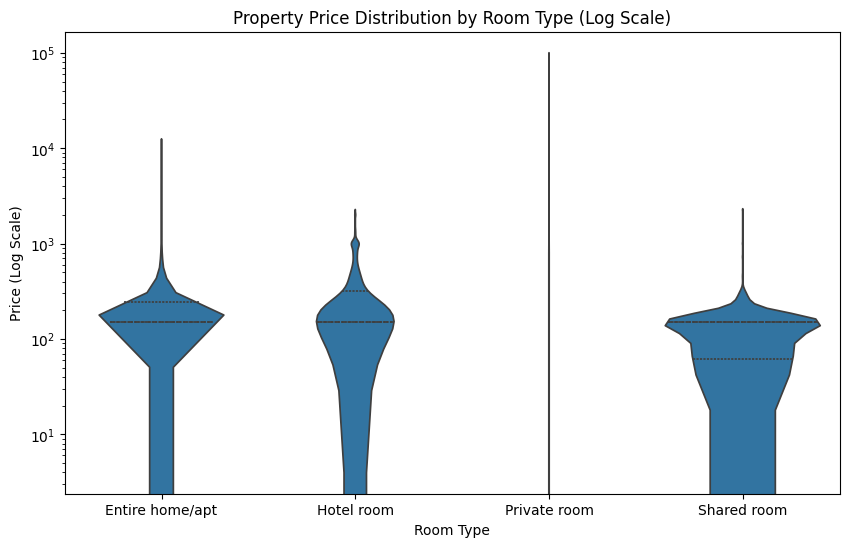

In [27]:
# Step 1: Create a violin plot to visualize the price distribution by room type with a logarithmic scale
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=df_cleaned, inner="quartile")

# Step 2: Set the y-axis to a logarithmic scale
plt.yscale('log')

# Step 3: Customize the plot
plt.title('Property Price Distribution by Room Type (Log Scale)')
plt.ylabel('Price (Log Scale)')
plt.xlabel('Room Type')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

Text(0.5, 0, 'Room Type')

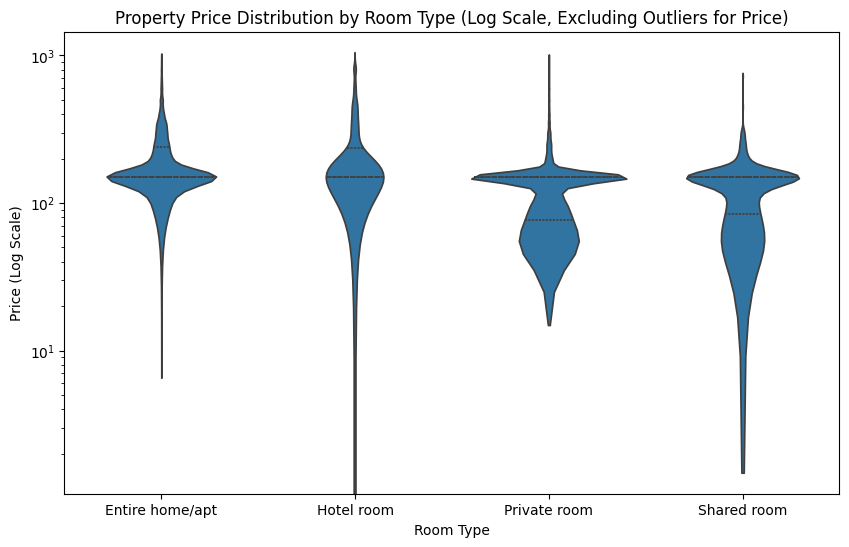

In [28]:

# Step 1: Define the price range by excluding outliers (1st percentile to 99th percentile)
lower_bound = np.percentile(df_cleaned['price'], 1)
upper_bound = np.percentile(df_cleaned['price'], 99)

# Step 2: Filter the DataFrame to include only the prices within this range
df_filtered = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

# Step 3: Create a violin plot to visualize the price distribution by room type with a logarithmic scale
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=df_filtered, inner="quartile")

# Step 4: Set the y-axis to a logarithmic scale
plt.yscale('log')


plt.title('Property Price Distribution by Room Type (Log Scale, Excluding Outliers for Price)')
plt.ylabel('Price (Log Scale)')
plt.xlabel('Room Type')

In [29]:
# Group by 'room_type' and calculate the median price for each, with observed=True to suppress the warning
room_type_price_comparison = df_cleaned.groupby('room_type', observed=True)['price'].median().reset_index()

print(room_type_price_comparison)

         room_type  price
0  Entire home/apt  150.0
1       Hotel room  150.0
2     Private room  150.0
3      Shared room  150.0


In [30]:
# Group by 'room_type' and calculate the median price for each, with observed=True to suppress the warning
room_type_price_comparison = df_cleaned.groupby('room_type', observed=True)['price'].mean().reset_index()

print(room_type_price_comparison)

         room_type       price
0  Entire home/apt  232.632922
1       Hotel room  301.676786
2     Private room  144.644278
3      Shared room  126.718808


**Median Price Analysis:**

The median price across all room types (Entire home/apt, Hotel room, Private room, and Shared room) is $150. This suggests that at the middle point of the price distribution, room types do not differ significantly in terms of price.


**Violin Plot (Price Distribution):**

The violin plot reveals much more about the distribution of prices for each room type.

While the median is the same for all room types, the violin plot likely shows that the price spread for Entire homes/apts and Hotel rooms is wider and includes much higher values than Private rooms and Shared rooms.

Entire homes/apts and Hotel rooms likely have a longer upper tail in the distribution, indicating the presence of listings that are priced significantly higher than the median. This is likely why their mean price is higher than that of Private rooms or Shared rooms (as seen in previous mean analysis).

Private rooms and Shared rooms have a narrower spread, and their prices are likely clustered closer to the median, which means fewer high-end, luxury offerings in these categories.

**Conclusion:**
+ `Entire homes/apts` and `Hotel rooms` are consistently more expensive at the high end of the price range, despite having the same median price as other room types. These types exhibit a broader spread of prices, especially in the luxury/high-end segment, which is not visible when considering only the median.


+ Room type DOES affect pricing, especially when considering the higher price ranges and variability, which are not captured by the median alone.

### Question 3: What is the correlation between the number of reviews and the availability of listings (availability_365)? Do listings with more reviews tend to be less available?

In [31]:
# Calculating the correlation between 'number_of_reviews' and 'availability_365'
correlation = df_cleaned['number_of_reviews'].corr(df_cleaned['availability_365'])
print(f'The correlation between number_of_reviews and availability_365 is: {correlation:.4f}')

The correlation between number_of_reviews and availability_365 is: 0.0682


The correlation coefficient is quite small (close to 0), suggesting that there is no strong linear relationship between the number of reviews a listing has and its availability over 365 days. Specifically, the positive value (0.0682) indicates a very slight positive correlation, but it is too weak to suggest any meaningful trend.

### Question 4: Are there any outliers in the price or minimum night stays? How do they compare to typical listings?

In [32]:

# Detect price outliers
_, price_lower_outliers, price_upper_outliers, price_lower_bound, price_upper_bound = detect_outliers_iqr(df_cleaned, 'price')

# Detect minimum nights outliers
_, min_nights_lower_outliers, min_nights_upper_outliers, min_nights_lower_bound, min_nights_upper_bound = detect_outliers_iqr(df_cleaned, 'minimum_nights')
# Output the results for price
print(f'Number of price outliers (lower): {len(price_lower_outliers)}')
print(f'Number of price outliers (upper): {len(price_upper_outliers)}')
print(f'Price lower bound: {price_lower_bound}, Price upper bound: {price_upper_bound}')
print(f'Typical price range: {df_cleaned["price"].median()}')

# Output the results for minimum nights
print(f'Number of minimum nights outliers (lower): {len(min_nights_lower_outliers)}')
print(f'Number of minimum nights outliers (upper): {len(min_nights_upper_outliers)}')
print(f'Minimum nights lower bound: {min_nights_lower_bound}, Minimum nights upper bound: {min_nights_upper_bound}')
print(f'Typical minimum nights range: {df_cleaned["minimum_nights"].median()}')

Number of price outliers (lower): 1584
Number of price outliers (upper): 5575
Price lower bound: 47.5, Price upper bound: 251.5
Typical price range: 150.0
Number of minimum nights outliers (lower): 5044
Number of minimum nights outliers (upper): 2273
Minimum nights lower bound: 30.0, Minimum nights upper bound: 30.0
Typical minimum nights range: 30.0


**Number of price outliers:** There are 7,159 outliers in the price column. The typical price range for listings is $150, with a lower bound of $47.5 and an upper bound of $251.5. There are more outliers on the upper end.

**Number of minimum night stays outliers:** There are 7,317 outliers in the minimum_nights column. Interestingly, the lower and upper bounds for minimum_nights are both 30, meaning any listing with a stay requirement other than 30 nights is considered an outlier. There are more outliers on the lower end.

**Conclusion:**
Price outliers suggest that there is a significant number of listings with extreme pricing with more outliers on the upper end.
Minimum nights outliers indicate that while 30 nights is the standard, a considerable number of listings deviate from this, with more outliers on the lower end.

### Question 5: How do hosts with multiple listings compare to those with a single listing in terms of reviews, pricing, and availability?

In [33]:
# Categorize hosts as 'Single Listing' or 'Multiple Listings' 
df_cleaned['host_type'] = np.where(df_cleaned['calculated_host_listings_count'] == 1, 
                                   'Single Listing', 'Multiple Listings')

# Group the data by 'host_type' and calculate the mean for 'number_of_reviews', 'price', and 'availability_365'
host_comparison = df_cleaned.groupby('host_type')[['number_of_reviews', 'price', 'availability_365']].mean().reset_index()


print(host_comparison)

           host_type  number_of_reviews       price  availability_365
0  Multiple Listings          22.926185  207.245327        204.879375
1     Single Listing          26.872299  179.490042         99.929926


#### Comparison

**Number of Reviews:** Hosts with single listings have a slightly higher average number of reviews (26.87) compared to hosts with multiple listings (22.93). This suggests that individual hosts might receive more reviews per listing, possibly because they focus more on managing one property.

**Pricing:** Hosts with multiple listings charge higher average prices ($207.25) compared to hosts with single listings ($179.49). This could indicate that hosts with multiple listings may have more premium or higher-end properties, or they could be professional hosts with higher pricing strategies.

**Availability:** Listings managed by hosts with multiple listings are available for more days (204.88 days) on average compared to listings from hosts with single listings (99.93 days). This suggests that hosts with multiple listings may manage properties that are more consistently available throughout the year, while single-listing hosts might block off more time or use the property themselves.

#### Conclusion
+ Hosts with multiple listings tend to charge higher prices and have their properties available for more days of the year, but they receive slightly fewer reviews per listing compared to hosts with a single listing. 
+ Single-listing hosts seem to attract more reviews per property, potentially indicating a closer or more personalized relationship with guests.